In [2]:
import pandas as pd
import numpy as pt
import matplotlib.pyplot as plt
%matplotlib inline

It looks like this file is in not in utf-8 encoding. When you try to read into Python using pd.read_csv, you'll get this error:

#UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 2: invalid start byte

To read in the files, all we need to do is add the "encoding" argument to read_csv and tell it the correct encoding, like so:

In [184]:
data1 = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
data2 = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
data3 = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
data4 = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

In [5]:
data1.shape

(29322, 3)

In [6]:
data2.shape

(29329, 3)

In [7]:
data3.shape

(29329, 3)

In [8]:
data4.shape

(2535, 14)

In [9]:
data1.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [10]:
data2.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [11]:
data3.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [12]:
data4.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [13]:
data4.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

Some of the column's name has space and it'd better to remove those spaces. We'll replace them with "_" caracter.

In [45]:
data1.columns = [c.replace(' ', '_') for c in data1.columns]
data2.columns = [c.replace(' ', '_') for c in data2.columns]
data3.columns = [c.replace(' ', '_') for c in data3.columns]
data4.columns = [c.replace(' ', '_') for c in data4.columns]


In [48]:
data1.columns

Index(['Geographic_Area', 'City', 'Median_Income'], dtype='object')

In [16]:
data1.dtypes

Geographic Area    object
City               object
Median Income      object
dtype: object

In [17]:
data2.dtypes

Geographic Area    object
City               object
poverty_rate       object
dtype: object

In [19]:
data3.dtypes

Geographic Area         object
City                    object
percent_completed_hs    object
dtype: object

In [20]:
data4.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

Let's merge first 3 datasets. To do this, we need to merge dataframes one by one. That means, we should merge first 2 df (data1 and data2) and the will merge their result with data3. For now we will use inner join method.


In [49]:
data1_2 = pd.merge(left=data1, right=data2, on=["Geographic_Area","City"], how="inner")

In [50]:
data1_2.head()

,Geographic_Area,City,Median_Income,poverty_rate
0,AL,Abanda CDP,11207,78.8
1,AL,Abbeville city,25615,29.1
2,AL,Adamsville city,42575,25.5
3,AL,Addison town,37083,30.7
4,AL,Akron town,21667,42


In [51]:
len(data1_2[data1_2.City.isnull()])

0

In [52]:
len(data1_2[data1_2.Median_Income.isnull()]) # has some null values!

51

In [54]:
len(data1_2[data1_2.poverty_rate.isnull()])

0

In [55]:
geo_data = pd.merge(left=data1_2, right=data3, on=["Geographic_Area","City"], how="inner")

In [56]:
geo_data.shape

(29320, 5)

In [57]:
geo_data.head()

,Geographic_Area,City,Median_Income,poverty_rate,percent_completed_hs
0,AL,Abanda CDP,11207,78.8,21.2
1,AL,Abbeville city,25615,29.1,69.1
2,AL,Adamsville city,42575,25.5,78.9
3,AL,Addison town,37083,30.7,81.4
4,AL,Akron town,21667,42,68.6


In [60]:
geo_data.dtypes

Geographic_Area         object
City                    object
Median_Income           object
poverty_rate            object
percent_completed_hs    object
dtype: object

In [62]:
geo_data.City.astype(str)
geo_data.dtypes

Geographic_Area         object
City                    object
Median_Income           object
poverty_rate            object
percent_completed_hs    object
dtype: object

In [69]:
geo_data.Median_Income = pd.to_numeric(geo_data.Median_Income,errors="coerce")
geo_data.poverty_rate = pd.to_numeric(geo_data.poverty_rate,errors="coerce")
geo_data.percent_completed_hs = pd.to_numeric(geo_data.percent_completed_hs,errors="coerce")

In [70]:
geo_data.dtypes

Geographic_Area          object
City                     object
Median_Income           float64
poverty_rate            float64
percent_completed_hs    float64
dtype: object

In [72]:
geo_data.Geographic_Area.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

# Let's plot some useful information!

We can plot median income for each state.

In [88]:
st_median_inc = geo_data.groupby("Geographic_Area")["Median_Income"].mean()
st_poverty_rate = geo_data.groupby("Geographic_Area")["poverty_rate"].mean()
st_percent_completed_hs = geo_data.groupby("Geographic_Area")["percent_completed_hs"].mean()

In [142]:
xlabels = geo_data.Geographic_Area.unique().tolist()
x=range(len(xTick))

(-2, 52)

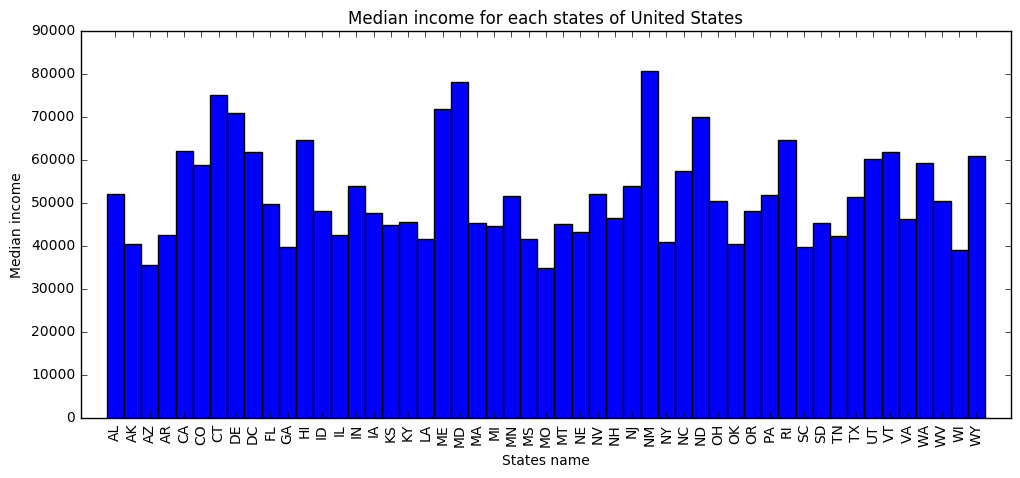

In [147]:
plt.figure(figsize=(12,5))
plt.bar(x,st_median_inc, width=1,align="center")
plt.xticks(x, xlabels,rotation=90)
plt.xlabel("States name")
plt.ylabel("Median income")
plt.title("Median housing income for each states of United States for 2015")
plt.xlim(-2,52)


(-2, 52)

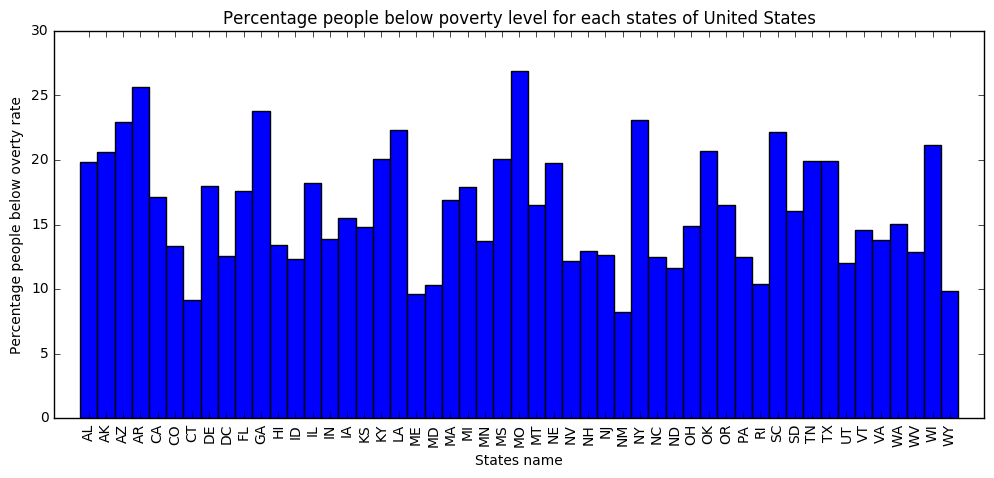

In [152]:
plt.figure(figsize=(12,5))
plt.bar(x,st_poverty_rate, width=1,align="center")
plt.xticks(x, xlabels,rotation=90)
plt.xlabel("States name")
plt.ylabel("Percentage people below overty rate")
plt.title("Percentage people below poverty level for each states of United States")
plt.xlim(-2,52)

(70, 100)

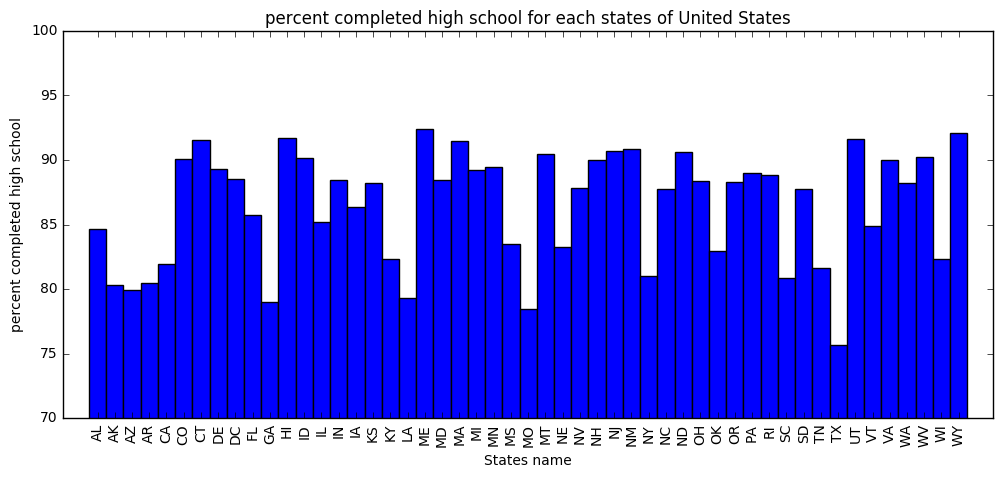

In [151]:
plt.figure(figsize=(12,5))
plt.bar(x,st_percent_completed_hs, width=1,align="center")
plt.xticks(x, xlabels,rotation=90)
plt.xlabel("States name")
plt.ylabel("percent completed high school")
plt.title("percent completed high school for each states of United States")
plt.xlim(-2,52)
plt.ylim(70,100)

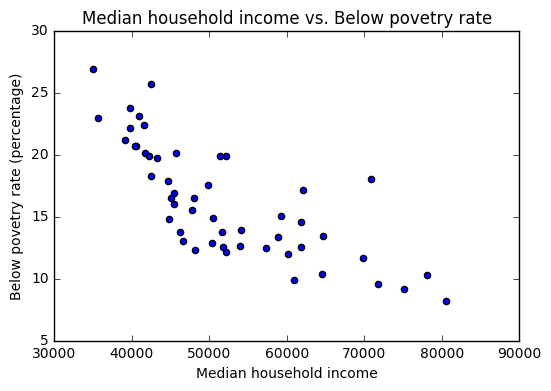

In [157]:
plt.scatter(st_median_inc,st_poverty_rate)
plt.xlabel("Median household income")
plt.ylabel("Below povetry rate (percentage)")
plt.title("Median household income vs. Below povetry rate")

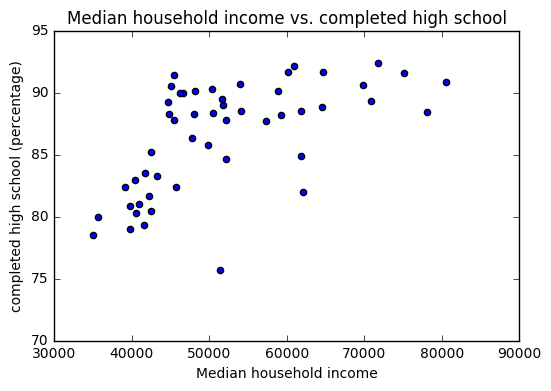

In [159]:
plt.scatter(st_median_inc,st_percent_completed_hs)
plt.xlabel("Median household income")
plt.ylabel("completed high school (percentage)")
plt.title("Median household income vs. completed high school")

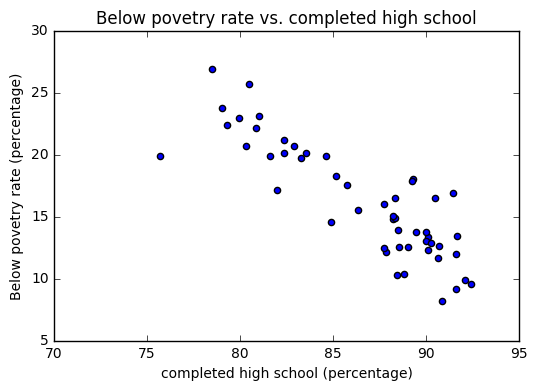

In [160]:
plt.scatter(st_percent_completed_hs,st_poverty_rate)
plt.xlabel("completed high school (percentage)")
plt.ylabel("Below povetry rate (percentage)")
plt.title("Below povetry rate vs. completed high school")

# Let's look at some information from forth dataset (fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015)

In [176]:
data4.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# Date

In [187]:
data4.date = pd.to_datetime(data4.date,format='%d/%m/%y')
# Data are from 2015-01-02 to 2017-07-31

# Manner of Death

In [190]:
data4.manner_of_death.describe()

count     2535
unique       2
top       shot
freq      2363
Name: manner_of_death, dtype: object

In [202]:
data4.manner_of_death = data4.manner_of_death.astype(str)

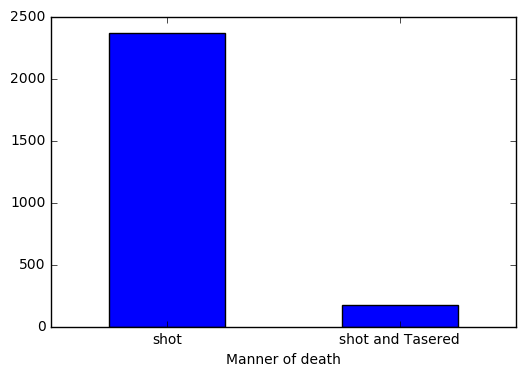

In [214]:
from collections import Counter

counts = Counter(data4.manner_of_death)
df = pd.DataFrame.from_dict(counts, orient='index')
df.plot(kind='bar',legend=None)
plt.xticks(rotation=0)
plt.xlabel("Manner of death")

# Armed

In [195]:
# len(data4.armed[data4.armed.isnull()]) there is 9 null values in armed column
data4.armed.describe()

count     2526
unique      68
top        gun
freq      1398
Name: armed, dtype: object

In [220]:
counts = Counter(data4.armed)
sorted(counts, key=counts.get, reverse=True)[:5]

['gun', 'knife', 'vehicle', 'unarmed', 'undetermined']

# Age

In [221]:
data4.age.describe()

C:\Users\Sina\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


count    2458.000000
mean       36.605370
std        13.030774
min         6.000000
25%              NaN
50%              NaN
75%              NaN
max        91.000000
Name: age, dtype: float64

In [225]:
len(data4.age[data4.age.isnull()]) # number of null values in age

77

In [223]:
data4[data4.age.isnull()].head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
124,584,Alejandro Salazar,2015-02-20,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
658,789,Roger Albrecht,2015-08-29,shot,knife,NaN,M,W,San Antonio,TX,False,other,Not fleeing,False
707,839,Lawrence Price,2015-09-17,shot,gun,NaN,M,W,Brodhead,KY,False,attack,Not fleeing,False
769,908,Jason Day,2015-10-12,shot,gun,NaN,M,B,Lawton,OK,False,attack,Not fleeing,False
802,1283,John Tozzi,2015-10-24,shot,gun,NaN,M,NaN,New Paltz,NY,False,attack,Not fleeing,False
818,964,Deaunte Lamar Bell,2015-10-29,shot,gun,NaN,M,B,Columbus,OH,False,other,Not fleeing,False
928,1074,TK TK,2015-12-10,shot,gun,NaN,M,NaN,Hemet,CA,False,attack,Not fleeing,False
936,1086,Efrain Villanueva,2015-12-12,shot,unknown weapon,NaN,M,NaN,Aurora,CO,False,attack,NaN,False
950,1097,Bryant Neil Duncan,2015-12-16,shot,knife,NaN,M,W,Camarillo,CA,True,attack,Not fleeing,False
962,1110,Michael Noel,2015-12-21,shot,unarmed,NaN,M,B,Breaux Bridge,LA,True,other,Not fleeing,False


For now we are gonna leave the null value like this. Two thing we can do about filling these values: <b:>
* Using the mean value af age
* Looking at the age vs. city or race or gender and perform the machine learning algorithms to guess these values

We'll use the first methode for now and will use the other method later.

In [229]:
data4.age = data4.age.fillna(data4.age.mean())

In [230]:
data4.age.describe()

count    2535.000000
mean       36.605370
std        12.831265
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

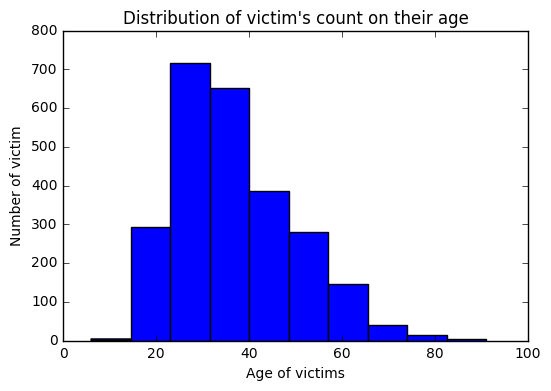

In [232]:
plt.hist(data4.age)
plt.xlabel("Age of victims")
plt.ylabel("Number of victim")
plt.title("Distribution of victim's count on their age")

# Gender

In [234]:
len(data4.gender[data4.gender.isnull()])

0

In [235]:
data4.gender.describe()

count     2535
unique       2
top          M
freq      2428
Name: gender, dtype: object

# Race

In [236]:
data4.race.describe()

count     2340
unique       6
top          W
freq      1201
Name: race, dtype: object

W: White, non-Hispanic <br />
B: Black, non-Hispanic <br />
A: Asian <br />
N: Native American <br />
H: Hispanic <br />
O: Other <br />
None: unknown <br />

In [262]:
counts = Counter(data4.race)
labels = ["White, non-Hispanic","Black, non-Hispanic","Asian","Native American ","Hispanic ","Other ","Unknown"]
#df.
df = pd.DataFrame.from_dict(counts, orient='index')
#plt.pie(df,autopct=None)
df.index = labels
#df.plot(kind='bar',legend=None)
#plt.xticks(rotation=0)
#plt.xlabel("Race")


([<matplotlib.patches.Wedge at 0x1b08efca9e8>,
  <matplotlib.text.Text at 0x1b08efe8cc0>])

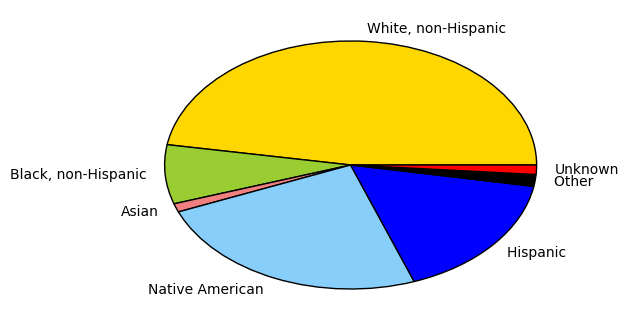

In [269]:
plt.pie(df[0],labels=labels,colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue','black','red'])